In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#loading the dataset
heart=pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [102]:
heart.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [103]:
#understanding the data
print("total no.of rows of the data: ",heart.shape[0])
print("total no.of columns of the data: ",heart.shape[1])

total no.of rows of the data:  1025
total no.of columns of the data:  14


**Columns and Description:**


1.   Age- Age of the patient
2.   Sex - gender of the patient
3.   cp - chest pain type
4.   trestbps-resulting blood pressure
5.   chol - serum cholestoral in mg/dl
6.   fbs-fasting blood sugar > 120 mg/dl(feature indicates whether the patient’s blood sugar level is above a certain threshold.)
7.   restecg- resting electrocardiographic results (values 0,1,2)
8.   thalach - maximum heart rate achieved
9.   exang - exercise induced angina
10.  oldpeak = ST depression induced by exercise relative to res
11.  slope - the slope of the peak exercise ST segment
12.  ca - number of major vessels (0-3) colored by flourosopy
13.  thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14.  Target: refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


In [104]:
#data types of the columns
heart.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [105]:
#convert the some columns to category data type
heart[["cp","fbs","restecg","exang","ca","thal","target","sex","slope"]]=heart[["cp","fbs","restecg","exang","ca","thal","target","sex","slope"]].astype("category")

In [106]:
heart.dtypes

,0
age,int64
sex,category
cp,category
trestbps,int64
chol,int64
fbs,category
restecg,category
thalach,int64
exang,category
oldpeak,float64


In [107]:
#renaming the columns
heart.rename(columns={"cp":"Chestpain","trestbps":"resbp","chol":"chol(mg/dl)","thalach":"Max_heart_rate","thal":"Thalassemia"},inplace=True)
heart

,age,sex,Chestpain,resbp,chol(mg/dl),fbs,restecg,Max_heart_rate,exang,oldpeak,slope,ca,Thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### **Univariate analysis**

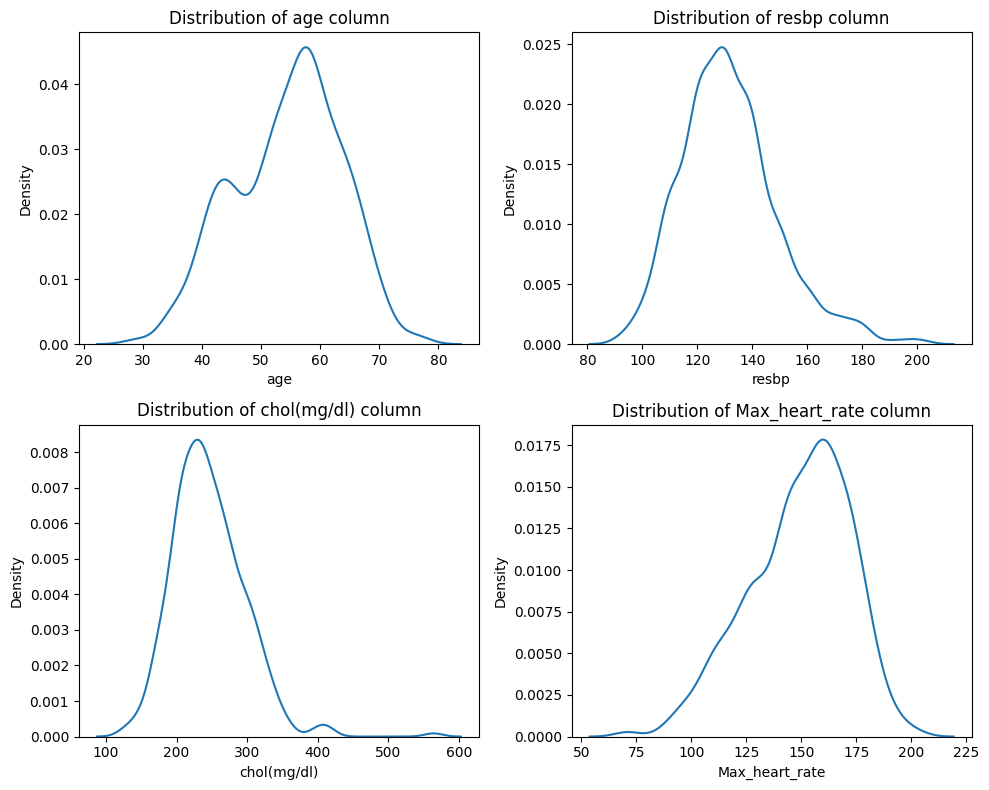

In [108]:
#
cols = heart.select_dtypes("int64").columns
# Create subplots (2x2 grid)
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# Plotting KDE plots for each integer column
for i, col in enumerate(cols):
    row = i // 2
    col_index = i % 2
    sns.kdeplot(heart[col], ax=ax[row, col_index])
    ax[row, col_index].set_title(f'Distribution of {col} column')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

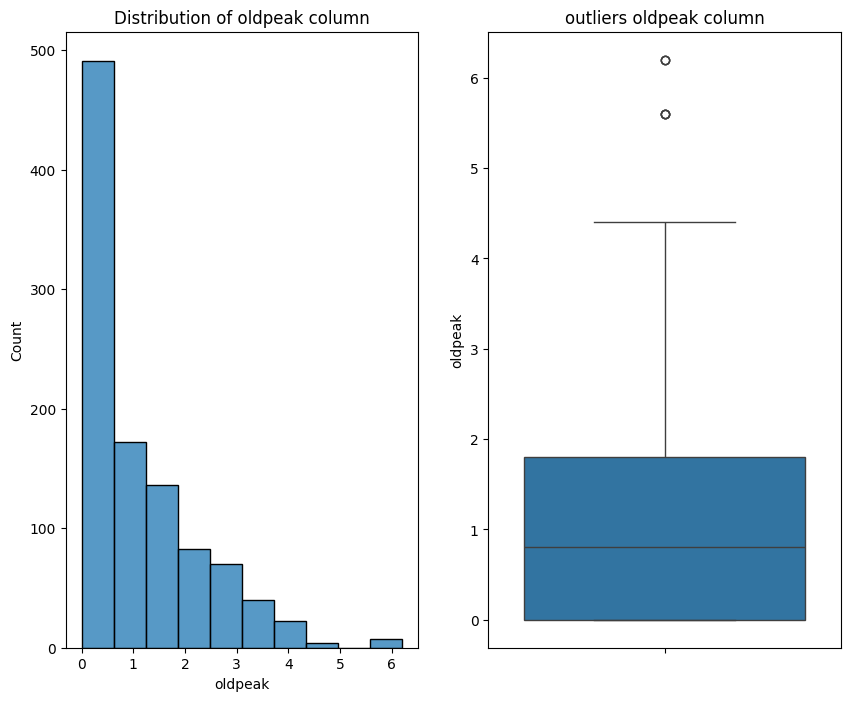

In [109]:
#distribution of the oldpeak
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.histplot(heart["oldpeak"],ax=ax[0],bins=10)
ax[0].set_title("Distribution of oldpeak column")
sns.boxplot(heart["oldpeak"],ax=ax[1])
plt.title("outliers oldpeak column")
plt.show()

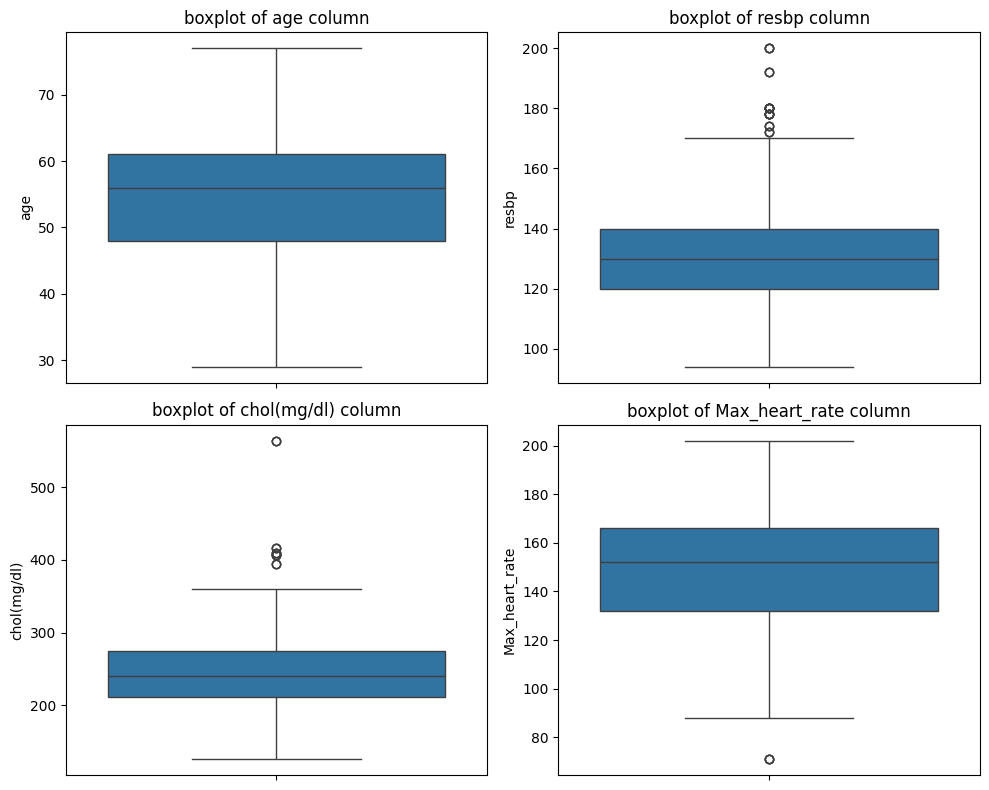

In [110]:
# box plots of the integer columns
fig,ax=plt.subplots(2,2,figsize=(10,8))
for i in range(len(cols)):
  row=i//2;
  col=i%2
  sns.boxplot(heart[cols[i]],ax=ax[row][col])
  ax[row][col].set_title(f'boxplot of {cols[i]} column')
plt.tight_layout()
plt.show()

*   age column follows left skewed distribution
*   most of the people are aged between the 55-65 years
*   minimum age of the patient is 29 and maximum age of the patient is 77
*   resultant bp column(resbp) approximately follows normal distribution with mean 131.61
*   chol(mg/dl) column follows right skewed distribution with skewness 1.07 and mean 246
*  Max heart rate follows left skewed distribution with skewness -0.5 and mean 149.114
*  chol(mg/dl) and resbp,Max_heart_rate has outliers
* Age column doesn't contain outliers
* oldpeak follows pareto distribution and it is right skewed distribution with skewness 1.210

In [111]:
#frequency distribution of the categorical columns
cat_cols=heart.select_dtypes("category").columns
print(cat_cols)

Index(['sex', 'Chestpain', 'fbs', 'restecg', 'exang', 'slope', 'ca',
       'Thalassemia', 'target'],
      dtype='object')


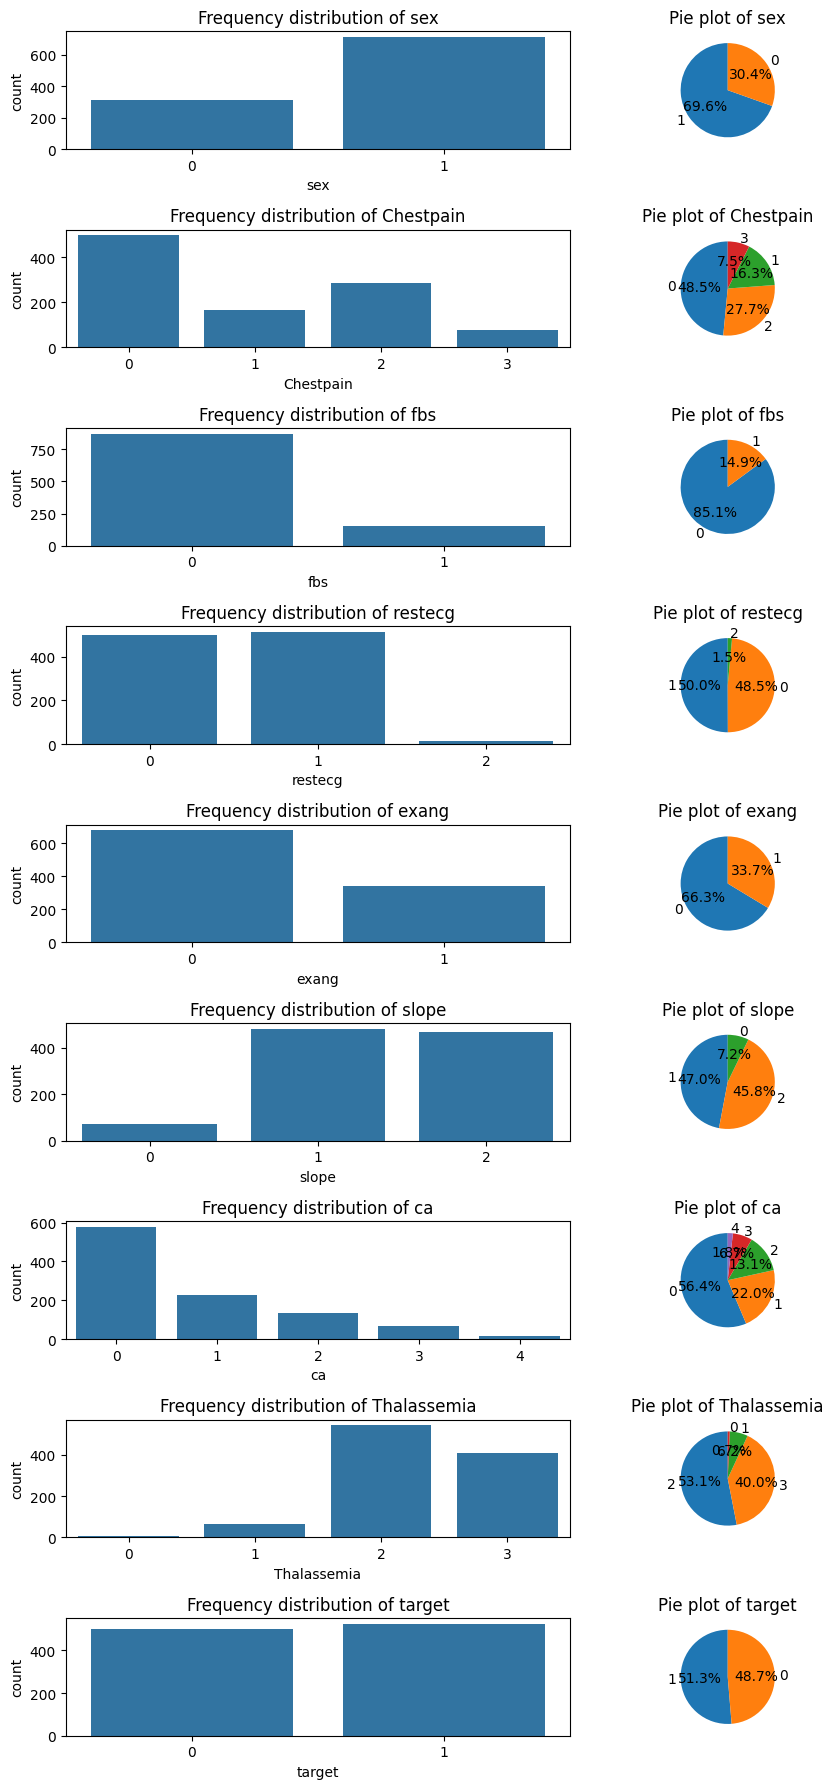

In [112]:
# Assuming cat_cols contains the list of categorical columns
fig, ax = plt.subplots(len(cat_cols), 2, figsize=(10, 2 * len(cat_cols)))
for i in cat_cols:
    row = cat_cols.get_loc(i)
    # Count plot for categorical column
    sns.countplot(x=heart[i], ax=ax[row, 0])
    ax[row, 0].set_title(f'Frequency distribution of {i}')
    # Pie chart for categorical column
    heart[i].value_counts().plot.pie(ax=ax[row, 1], autopct='%1.1f%%', startangle=90)
    ax[row, 1].set_title(f'Pie plot of {i}')
    ax[row, 1].set_ylabel('')  # Remove default ylabel
plt.tight_layout()
plt.show()

## **Bivariate Analysis:**

Index(['age', 'resbp', 'chol(mg/dl)', 'Max_heart_rate', 'oldpeak'], dtype='object')
5


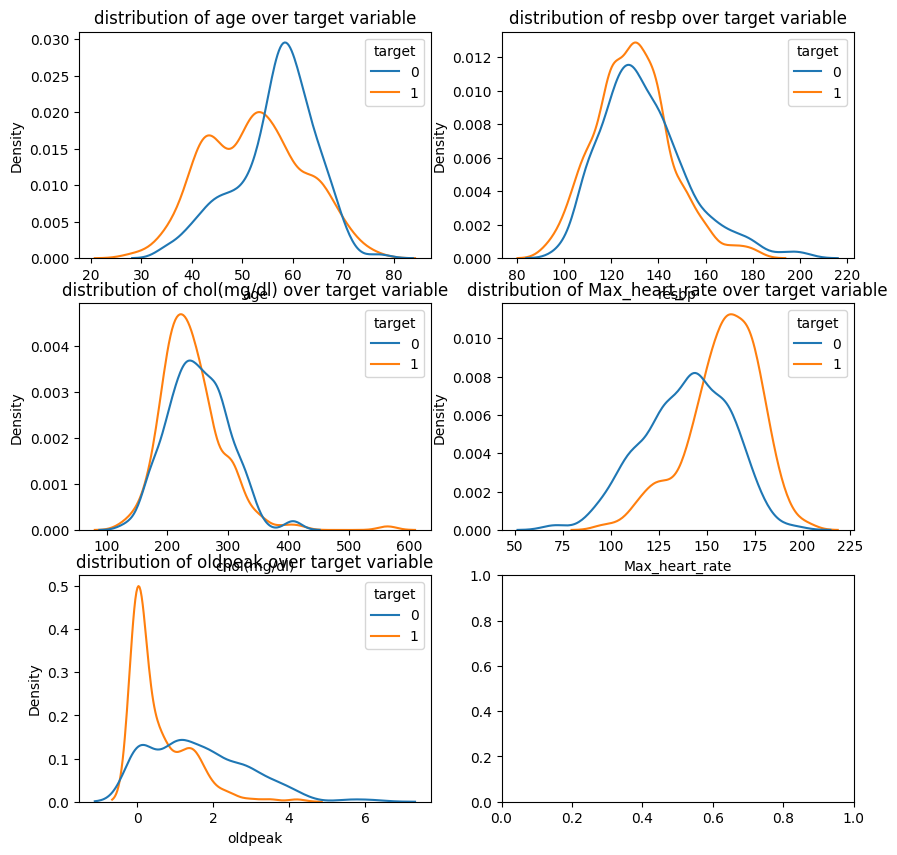

In [113]:
cols=heart.select_dtypes(["int","float"]).columns
print(cols)
size=len(cols)
print(size)
fig,ax=plt.subplots(3,2,figsize=(10,2*size))
data=list(cols)
for i in data:
  sns.kdeplot(data=heart,x=i,hue="target",ax=ax[data.index(i)//2,data.index(i)%2])
  ax[data.index(i)//2,data.index(i)%2].set_title("distribution of {} over target variable".format(i))
plt.show()

### **Observations:**

1.   people with age between 55 to 70 have high probability to not affect by the heart disease
2.   people with age between 20 to 54 have high probability to affect by the heart disease
3.   people having resultant blood pressure less than or equal to 140 have the high probability to affeted by the heart disease than the people having resultant blood pressure greater than 140
4.   people having cholostrol less than or equal to 280 gm/ml have high probability to not affected by the heart disease
5.   peoplw having max heart rate greater than 150 have the high probability to not affected by the heart disease than the rest of the people having max heart rate less than 150

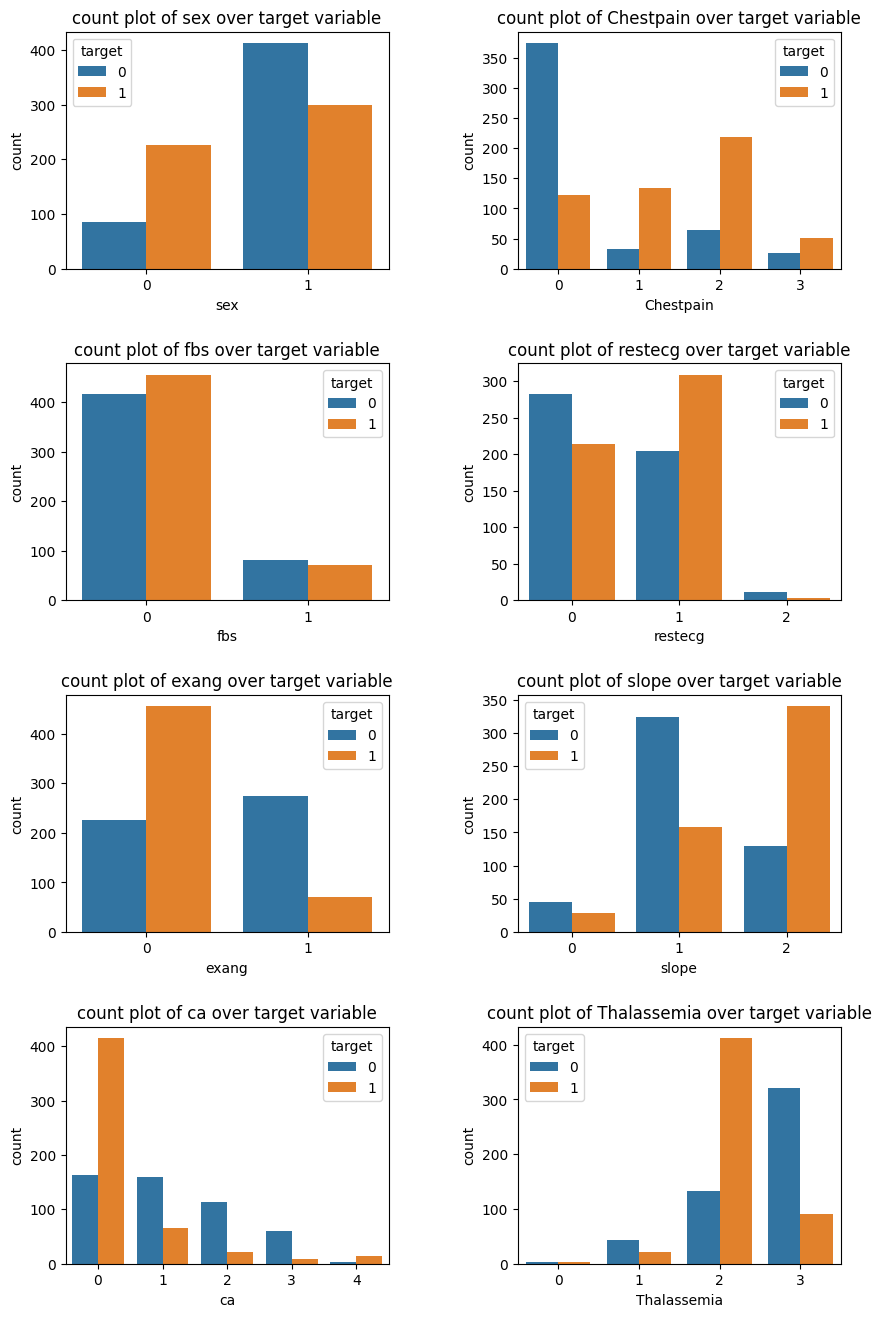

In [114]:
#categorical variables
cols=list(heart.select_dtypes("category").columns)
cols.remove("target")
fig,ax=plt.subplots(len(cols)//2,2,figsize=(10,2*len(cols)))
for i in cols:
  sns.countplot(data=heart,x=heart[i],hue="target",ax= ax[cols.index(i)//2][cols.index(i)%2])
  ax[cols.index(i)//2][cols.index(i)%2].set_title("count plot of {} over target variable".format(i))
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

### **Observations:**
*   most of the females are affected by the heart disease than the males
*   most of the affected people have the type 2 chest pain
*   people with chest pain type 0 has high probability to not affected by heart disease


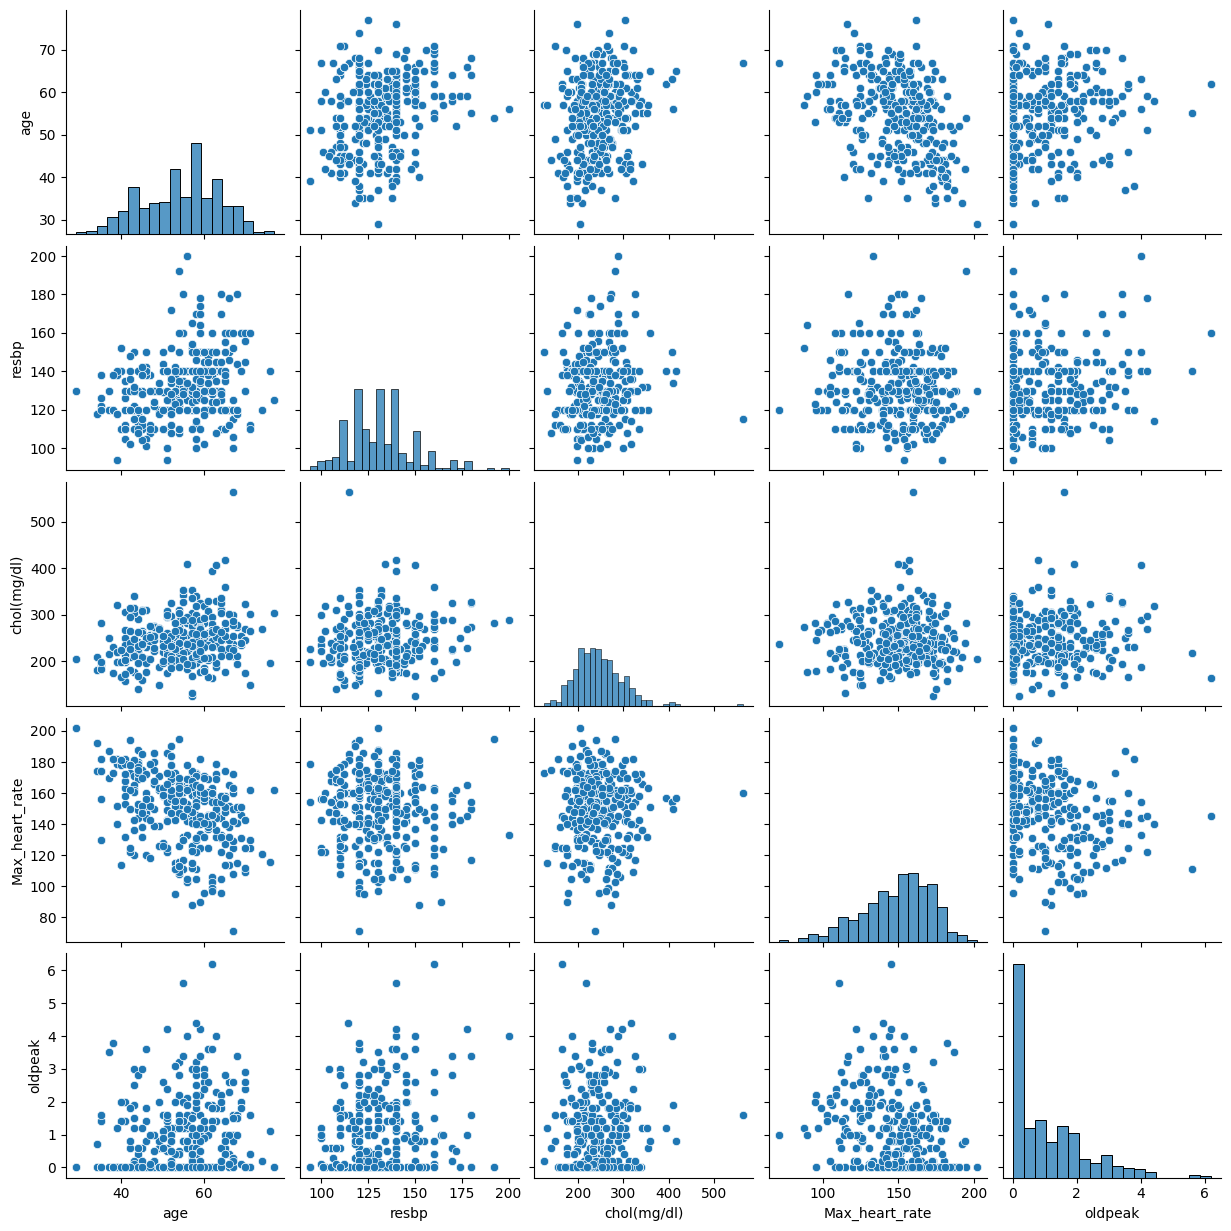

In [115]:
#pair plot
sns.pairplot(heart)

<Axes: >

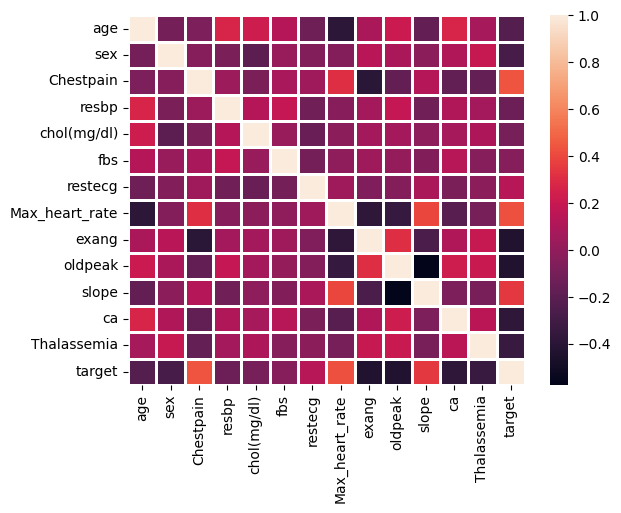

In [116]:
#correlation analysis
sns.heatmap(heart.corr(),linewidths=0.9)

In [117]:
 #feature engineering
 heart["sex"]=heart["sex"].map({0:"M",1:"F"})

In [118]:
heart.rename(columns={"target":"isAffected"},inplace=True)
heart["isAffected"]=heart["isAffected"].map({
    0:"No",
    1:"Yes"
})
heart

,age,sex,Chestpain,resbp,chol(mg/dl),fbs,restecg,Max_heart_rate,exang,oldpeak,slope,ca,Thalassemia,isAffected
0,52,F,0,125,212,0,1,168,0,1.0,2,2,3,No
1,53,F,0,140,203,1,0,155,1,3.1,0,0,3,No
2,70,F,0,145,174,0,1,125,1,2.6,0,0,3,No
3,61,F,0,148,203,0,1,161,0,0.0,2,1,3,No
4,62,M,0,138,294,1,1,106,0,1.9,1,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,F,1,140,221,0,1,164,1,0.0,2,0,2,Yes
1021,60,F,0,125,258,0,0,141,1,2.8,1,1,3,No
1022,47,F,0,110,275,0,0,118,1,1.0,1,1,2,No
1023,50,M,0,110,254,0,0,159,0,0.0,2,0,2,Yes
